# AST4930 Homework Assignment #2 (20 pts)

### Instruction:

In this homework, we will use a subset of the SDSS DR16 data (https://www.sdss.org/dr16/) and train kNN and decision tree models which will be used to classify objects into galaxies, quasars, and stars. We will follow the 8 main steps for ML problems (see AST4930_2021Fall_W1C2.pdf on Canvas). Below you will find instruction to this homework assignment.

1. Copy this Jupyter Notebook under your HiPerGator directory (or your local machine) and change the file name to AST4930_homework2_yourlastname.ipynb. For example, it would be AST4930_homework2_Bae.ipynb for me.

2. As you will see, the Notebook is partially filled. Fill in the empty cells. 

3. Note that there are questions you will have to answer. They will start with "Q: ..." The answers will be graded so make sure you answer all the questions.

4. It's fine you work on somewhere else than HiPerGator. But when I grade your homework, I will run your Jupyter Notebook on HiPerGator. So before you submit your homework, make sure you test it on HiPerGator and see if you get any error messages.

5. It's fine if you use someone else's code you found on Internet, but make sure you write down the source. You don't have to cite me when you use anything from AST4930 Notebook.

6. It's a common sense but just to make sure... when you make a figure, make sure they are readable/understandable. If you cannot see the title, labels, data points, or if you don't understand the point of the figure, I won't probably be able to see/understand them either!

6. Submit your final .ipynb file via Canvas before the due date.

## Step 1: Define a problem.

### We will train and evaluate kNN and decision tree models to classify objects in the SDSS data into galaxies, quasars, and stars.

## Step 2: Collect the data.

### Let's load the data. It's in .csv format.

In [1]:
import pandas as pd 

data = pd.read_csv('/blue/ast4930/share/SDSS.csv')

## Step 3: Visualize and inspect the data to gain insights.

In [2]:
data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237655107828973746,138.937318,49.779249,17.32152,16.28594,15.88471,15.66384,15.46604,2243,301,3,152,862475375345690624,GALAXY,0.028514,766,52247,131
1,1237678584114511952,31.594644,22.451246,18.13019,17.47997,16.97868,16.75768,16.83714,7709,301,3,65,2303710287351539712,QSO,1.694959,2046,53327,433
2,1237680298881122360,333.991221,19.977552,18.94798,18.80473,18.75522,18.72968,18.66552,8108,301,5,79,8532228490187264000,QSO,2.046520,7578,56956,578
3,1237650761319514319,186.201096,-2.808180,19.22969,18.04638,17.37830,16.99285,16.76479,1231,301,3,113,376103378880587776,GALAXY,0.000000,334,51993,192
4,1237648722280317126,124.814240,0.651496,18.76061,17.28682,16.74055,16.55152,16.45902,756,301,5,60,2316149895234349056,STAR,0.000196,2057,53816,632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1237673758185554973,100.889697,29.106283,19.17071,18.21106,17.80099,17.63203,17.53079,6585,301,6,121,3013004977846118400,STAR,0.000160,2676,54179,352
149996,1237671262268752282,124.964450,9.635759,19.38253,17.49415,16.55436,16.13420,15.80408,6004,301,5,61,2728125362876737536,GALAXY,0.110984,2423,54149,254
149997,1237673756573762584,98.821075,26.946457,18.90948,17.73591,17.31252,17.16612,17.07103,6585,301,3,103,3035579600630474752,STAR,0.000097,2696,54167,558
149998,1237678877782966354,320.766012,9.993010,17.63177,16.10855,15.35884,15.21912,15.11279,7777,301,6,66,821986413082863616,STAR,-0.000218,730,52466,289


### Optional: If you are more familiar with using numpy arrays than pandas, convert the data into numpy arrays.

In [3]:
data = data.to_numpy()

### In addition to ugriz magnitudes, we will use colors (u-g, g-r, r-i, i-z) so let's make those arrays.

In [4]:
## From W3 notebook

ra = data[:,1] # rising assencion
dec = data[:,2] # declination

u = data[:,3] # u column 
g = data[:,4]
r = data[:,5]
i = data[:,6]
z = data[:,7]

obj_type = data[:,13] # class of object, galax, star, etc. string array

# Extract colors and spectral class
ug = u - g
gr = g - r
ri = r - i
iz = i - z

# Separating galaxies and quasars
galaxies = (obj_type == 'GALAXY')
qsos = (obj_type == 'QSO')
star = (obj_type == 'STAR')


### Let's make a few color-magnitude diagrams and color-color diagrams. Since our goal is to classify the data, it might be wise to color-code the data points by their class.


Text(0, 0.5, '$i-z$')

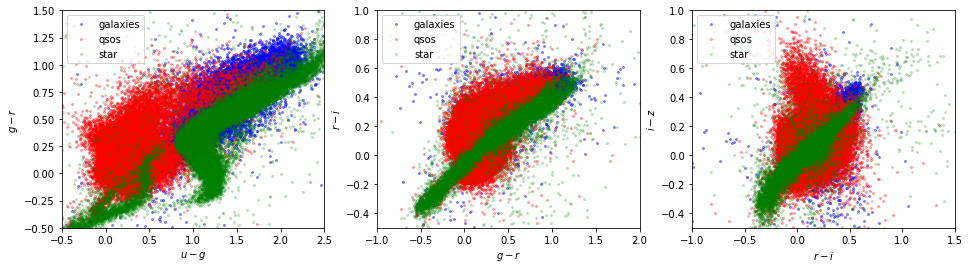

In [5]:
## From W3 notebook
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 4))

ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(-0.5, 1.5)

ax1.plot(ug[galaxies], gr[galaxies], '.', ms=4, c='b', label='galaxies', alpha=0.4)
ax1.plot(ug[qsos], gr[qsos], '.', ms=4, c='r', label='qsos', alpha=0.3)
ax1.plot(ug[star], gr[star], '.', ms=4, c='g', label='star', alpha=0.2)

ax1.legend(loc=2)

ax1.set_xlabel('$u-g$')
ax1.set_ylabel('$g-r$')

ax2.set_xlim(-1, 2.)
ax2.set_ylim(-0.5, 1.)

ax2.plot(gr[galaxies], ri[galaxies], '.', ms=4, c='b', label='galaxies', alpha=0.4)
ax2.plot(gr[qsos], ri[qsos], '.', ms=4, c='r', label='qsos', alpha=0.3)
ax2.plot(gr[star], ri[star], '.', ms=4, c='g', label='star', alpha=0.2)

ax2.legend(loc=2)

ax2.set_xlabel('$g-r$')
ax2.set_ylabel('$r-i$')

ax3.set_xlim(-1, 1.5)
ax3.set_ylim(-0.5, 1.)

ax3.plot(ri[galaxies], iz[galaxies], '.', ms=4, c='b', label='galaxies', alpha=0.4)
ax3.plot(ri[qsos], iz[qsos], '.', ms=4, c='r', label='qsos', alpha=0.3)
ax3.plot(ri[star], iz[star], '.', ms=4, c='g', label='star', alpha=0.2)

ax3.legend(loc=2)

ax3.set_xlabel('$r-i$')
ax3.set_ylabel('$i-z$')

Text(0, 0.5, '$z$')

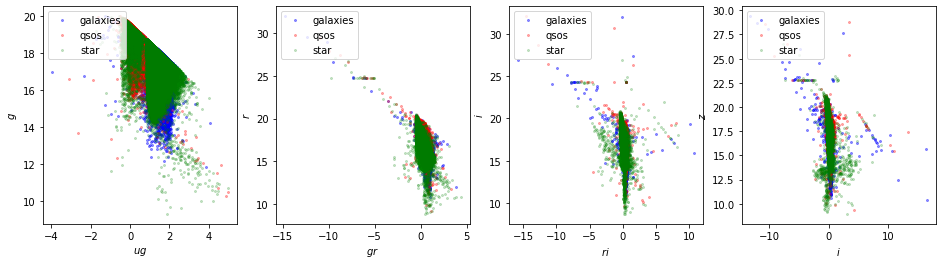

In [6]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 4))

ax1.plot(ug[galaxies], g[galaxies], '.', ms=4, c='b', label='galaxies', alpha=0.4)
ax1.plot(ug[qsos], g[qsos], '.', ms=4, c='r', label='qsos', alpha=0.3)
ax1.plot(ug[star], g[star], '.', ms=4, c='g', label='star', alpha=0.2)

ax1.legend(loc=2)

ax1.set_xlabel('$ug$')
ax1.set_ylabel('$g$')

ax2.plot(gr[galaxies], r[galaxies], '.', ms=4, c='b', label='galaxies', alpha=0.4)
ax2.plot(gr[qsos], r[qsos], '.', ms=4, c='r', label='qsos', alpha=0.3)
ax2.plot(gr[star], r[star], '.', ms=4, c='g', label='star', alpha=0.2)

ax2.legend(loc=2)

ax2.set_xlabel('$gr$')
ax2.set_ylabel('$r$')

ax3.plot(ri[galaxies], i[galaxies], '.', ms=4, c='b', label='galaxies', alpha=0.4)
ax3.plot(ri[qsos], i[qsos], '.', ms=4, c='r', label='qsos', alpha=0.3)
ax3.plot(ri[star], i[star], '.', ms=4, c='g', label='star', alpha=0.2)

ax3.legend(loc=2)

ax3.set_xlabel('$ri$')
ax3.set_ylabel('$i$')

ax4.plot(iz[galaxies], z[galaxies], '.', ms=4, c='b', label='galaxies', alpha=0.4)
ax4.plot(iz[qsos], z[qsos], '.', ms=4, c='r', label='qsos', alpha=0.3)
ax4.plot(iz[star], z[star], '.', ms=4, c='g', label='star', alpha=0.2)

ax4.legend(loc=2)

ax4.set_xlabel('$i$')
ax4.set_ylabel('$z$')

### Let's also make some plots including redshift.

In [7]:
rdshft = data[:,14] # array for red shift values 

Text(0, 0.5, '$g-r$')

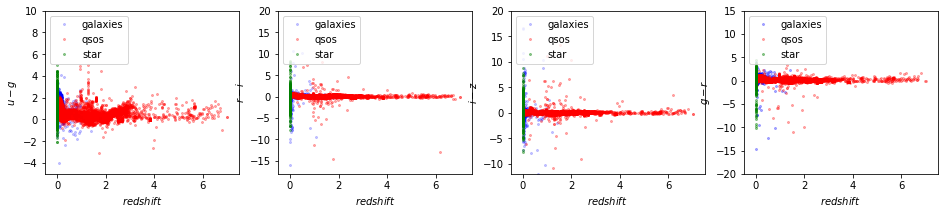

In [8]:
# red shift plot

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 3))

## redshift vs u-g
ax1.set_xlim(-0.5, 7.5)
ax1.set_ylim(-5, 10)

ax1.plot(rdshft[galaxies], ug[galaxies], '.', ms=4, c='b', label='galaxies', alpha=0.2)
ax1.plot(rdshft[qsos], ug[qsos], '.', ms=4, c='r', label='qsos', alpha=0.3)
ax1.plot(rdshft[star], ug[star], '.', ms=4, c='g', label='star', alpha=0.4)

ax1.legend(loc=2)

ax1.set_xlabel('$red shift$')
ax1.set_ylabel('$u-g$')

## redshift vs r-i
ax2.set_xlim(-0.5, 7.5)
ax2.set_ylim(-18, 20.)

ax2.plot(rdshft[galaxies], ri[galaxies], '.', ms=4, c='b', label='galaxies', alpha=0.2)
ax2.plot(rdshft[qsos], ri[qsos], '.', ms=4, c='r', label='qsos', alpha=0.3)
ax2.plot(rdshft[star], ri[star], '.', ms=4, c='g', label='star', alpha=0.4)

ax2.legend(loc=2)

ax2.set_xlabel('$red shift$')
ax2.set_ylabel('$r-i$')

## redshift vs i - z
ax3.set_xlim(-0.5, 7.5)
ax3.set_ylim(-12, 20.)

ax3.plot(rdshft[galaxies], iz[galaxies], '.', ms=4, c='b', label='galaxies', alpha=0.2)
ax3.plot(rdshft[qsos], iz[qsos], '.', ms=4, c='r', label='qsos', alpha=0.3)
ax3.plot(rdshft[star], iz[star], '.', ms=4, c='g', label='star', alpha=0.4)

ax3.legend(loc=2)

ax3.set_xlabel('$red shift$')
ax3.set_ylabel('$i-z$')

## redshift vs g-r
ax4.set_xlim(-0.5, 7.5)
ax4.set_ylim(-20, 15.)

ax4.plot(rdshft[galaxies], gr[galaxies], '.', ms=4, c='b', label='galaxies', alpha=0.3)
ax4.plot(rdshft[qsos], gr[qsos], '.', ms=4, c='r', label='qsos', alpha=0.3)
ax4.plot(rdshft[star], gr[star], '.', ms=4, c='g', label='star', alpha=0.4)

ax4.legend(loc=2)

ax4.set_xlabel('$red shift$')
ax4.set_ylabel('$g-r$')


### Q: Do you think we need feature scaling? If yes, explain why and write a script to scale features. If no, explain why and move on to the next step.

We don't need feature scaling because the values are all within the same magnitude. For the red shift the values that extend beyond 0 to 2 are
mostly all of one class anyhow.


In [9]:
## Make arrays compatable w/ sklearn knn and DT
import numpy as np

# X for an array containing features (i.e., colors and redshift)
X = np.array([ug, gr, ri, iz, u, g, r, i, z, rdshft]).T

# y for an array containing labels (i.e., galaxies, qsos, or stars)
y = np.expand_dims(obj_type, axis=1)


In [10]:
## Slpit into training/test data sets
from sklearn.model_selection import train_test_split

#If you want to reproduce the result, make sure you use the same random_state value.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112500, 10), (37500, 10), (112500, 1), (37500, 1))

In [11]:
### feature scaling 
#from sklearn.preprocessing import StandardScaler
#
## compute mean and variance w/ training data and apply standardization
## to both data sets
#
#X_train_scaled = StandardScaler().fit(X_train).transform(X_train)
#X_test_scaled = StandardScaler().fit(X_train).transform(X_test)
#

## Step 4: Select a ML algorithm.

### We will work with kNN and decision trees.

In [12]:
from sklearn import neighbors
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier, plot_tree

## Step 5: Prepare the data for the ML algorithm.

## Step 6: Train the machine.

### Let's train kNN first.

In [13]:
training_accuracy = []
test_accuracy = []

n_neighbors = np.arange(1,21)

for i in n_neighbors:
    print(i) # I am going to print out i to keep track of things.
    model = neighbors.KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))
 

1


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


2


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


3


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


4


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


5


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


6


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


7


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


8


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


9


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


10


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


11


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


12


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


13


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


14


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


15


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


16


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


17


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


18


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


19


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


20


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


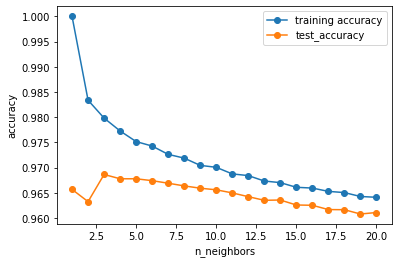

In [14]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(n_neighbors, training_accuracy, 'o-')
ax.plot(n_neighbors, test_accuracy, 'o-')

ax.set_xlabel('n_neighbors')
ax.set_ylabel('accuracy')
#ax.set_ylim(0.98,1)
ax.legend(['training accuracy','test_accuracy'])

## Step 7: Check the result and fine-tune your model by varying hyperparameters.

### In this homework, let's vary n_neighbors only.

In [15]:
best_n_neighbors = np.argmax(test_accuracy)
print(best_n_neighbors)

model = neighbors.KNeighborsClassifier(n_neighbors=best_n_neighbors)
model.fit(X_train, y_train)

2


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

### Q: What is the optimal k?



2




## Step 6: Train the machine.

### Now, let's try Decision Trees. For Decision Tree, set random_state parameter to 0 so that I can reproduce your result!

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

training_accuracy = []
test_accuracy = []

n_neighbors = np.arange(1,31)

for i in n_neighbors:
    print(i) # I am going to print out i to keep track of things.
    model = DecisionTreeClassifier(max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


## Step 7: Check the result and fine-tune your model by varying hyperparameters.

### In this homework, let's vary max_depth only.

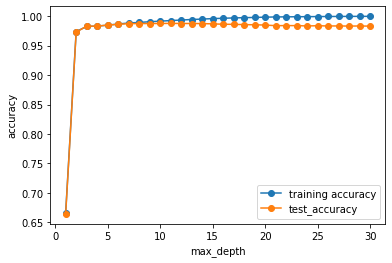

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(n_neighbors, training_accuracy, 'o-')
ax.plot(n_neighbors, test_accuracy, 'o-')

ax.set_xlabel('max_depth')
ax.set_ylabel('accuracy')
ax.legend(['training accuracy','test_accuracy'])

### Q: What is the optimal max_depth?

In [18]:
best_max_depth = np.argmax(test_accuracy)
print(best_max_depth)

model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=0)
model.fit(X_train, y_train)


10


DecisionTreeClassifier(max_depth=10, random_state=0)

### Q: Which features are the most important?

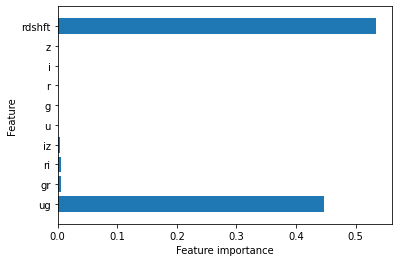

In [19]:
# This function might be useful.
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), ['ug', 'gr', 'ri', 'iz', 'u', 'g', 'r', 'i', 'z', 'rdshft'])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(model)    

## 8. Apply the model to a new dataset.

### Here, you don't do any parameter optimization. You simply use the "best" parameter i.e., n_neighbor in kNN and max_depth in DT that gave you the best accuracy, and that's it.

In [20]:
data_eval = pd.read_csv('/blue/ast4930/share/SDSS_evaluation.csv')
#data_eval = data_eval.to_numpy()

In [21]:
data_eval

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666210854536279,267.693275,25.382464,21.43812,20.14254,19.53728,19.27723,19.11268,4828,301,4,125,2470235456227272704,STAR,-0.000848,2194,53904,40
1,1237661958293029652,195.497352,51.631548,23.92653,22.86720,21.38509,20.37984,19.71321,3838,301,3,18,9258422668042194944,GALAXY,0.645810,8223,57429,537
2,1237660961328399002,137.277106,33.357736,21.32821,21.11290,19.40331,18.65184,18.21766,3606,301,2,89,6542733657546969088,QSO,1.788380,5811,56334,470
3,1237678858479272458,17.874748,11.723564,22.02962,21.37774,21.52691,21.45392,20.66333,7773,301,2,427,5254744288475238400,QSO,2.134945,4667,55868,616
4,1237680272040461216,343.158072,20.848515,22.80926,22.97740,21.88842,20.83235,20.04866,8102,301,3,123,8567048099343912960,GALAXY,0.730557,7609,56959,275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1237678879951159742,9.766930,-3.015522,23.65226,21.61961,20.13433,19.37306,18.93905,7778,301,2,382,4919149974368047104,GALAXY,0.510960,4369,55827,339
149996,1237678879959089467,27.855484,-2.793334,22.06322,22.34275,20.57937,19.61827,18.98400,7778,301,2,503,4895474185990852608,GALAXY,0.536282,4348,55559,223
149997,1237655109452955889,190.707871,60.870616,24.53051,21.30150,19.53934,18.75113,18.30253,2243,301,6,356,7701346515105894400,GALAXY,0.456249,6840,56685,695
149998,1237667731809632287,132.411868,14.917552,19.19523,18.88476,18.85863,18.95066,18.98802,5182,301,5,122,2737136404868917248,STAR,0.000181,2431,53818,268


### In addition to ugriz magnitudes, we will use colors (u-g, g-r, r-i, i-z) so let's make those arrays.

In [22]:
eu = data_eval['u']
eg = data_eval['g']
er = data_eval['r']
ei = data_eval['i']
ez = data_eval['z']

ered = data_eval['redshift']

eug = eu - eg
egr = eg - er
eri = er - ei
eiz = ei - ez

eval_obj = data_eval['class']
galaxies = (eval_obj == 'GALAXY')
qsos = (eval_obj == 'QSO')
star = (eval_obj == 'STAR')

In [23]:
Xe = np.transpose([eug, egr, eri, eiz, eu, eg, er, ei, ez, ered])
Ye = eval_obj

### Evaluation using kNN.

In [24]:
model = neighbors.KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)
model.score(Xe,Ye)

/home/odonnells/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.5778133333333333

### Evaluation using Decision Tree.

In [25]:
model = DecisionTreeClassifier(max_depth=10, random_state=0)
model.fit(X_train, y_train)
model.score(Xe,Ye)

0.81102

### Q: How did your model do? Discuss the evaluation result.

My kNN model had a 58% accuracy and DT had 81% accuray. kNN did not do as well and took far longer than DT.
My accuracy might have been slightly improved had I used feature scaling. 


### Q: Any final thoughts on kNN vs. DT? e.g., which one do you think is easy to use, easy to interpret, more accurate, more efficient, etc?

kNN is a brute force way to try and create models. It is not very accurate and takes a long time for many neighbors. 
DT is more accurate and more efficent than kNN and just as easy to interpret.
